# Task 1 Data Selection and Distribution
##1.What is the proportion of cars which can be classified as a "kick"

In [1]:
import pandas as pd;
import numpy as np;
import matplotlib.pyplot as plt;
import seaborn as sns;

# Task 1.1
df=pd.read_csv("KICK.csv");
df["IsBadBuy"]=df["IsBadBuy"].astype(str);
proportion=df["IsBadBuy"].value_counts(dropna=True,normalize=True)
print("The proportion of carts classified as a \"kick\" is ", proportion[1]*100, "%");

The proportion of carts classified as a "kick" is  12.94965763333012 %


E:\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (27) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


##2. Did you have to fix any data quality problem? Detial them
we can see there are many data quality problems, the summary about the prolblem is as follow:
1. missing value: NaN, ? , 0 and 1(impossible for price), #VALUE!
2. repeat: transimission(manual, MANUAL), OnlineSale(0.0,0),Forsale(Yes,YES),Nationality(USA,AMERICAN)
3. outlier or error: Onliesale(4.0,2.0,-1.0)
4. type problem: numerical value has been seen as string type. 


In [2]:
#Task 1.2
df2=df.drop(["PurchaseID","PurchaseTimestamp","PurchaseDate"],axis=1,inplace=False);
print("The NaN distribution is as follow:");
print(df2.isnull().sum(),end="\n\n");
features=df2.columns;
for attribute in features:
     print(attribute,end="\n");
     print(df[attribute].value_counts(dropna=False),end="\n\n");

The NaN distribution is as follow:
Auction                               44
VehYear                               44
Make                                  44
Color                                 44
Transmission                          44
WheelTypeID                           44
WheelType                             96
VehOdo                                44
Nationality                           44
Size                                  44
TopThreeAmericanName                  44
MMRAcquisitionAuctionAveragePrice     60
MMRAcquisitionAuctionCleanPrice       47
MMRAcquisitionRetailAveragePrice      47
MMRAcquisitonRetailCleanPrice        149
MMRCurrentAuctionAveragePrice         47
MMRCurrentAuctionCleanPrice           47
MMRCurrentRetailAveragePrice          67
MMRCurrentRetailCleanPrice            67
MMRCurrentRetailRatio                360
PRIMEUNIT                             44
AUCGUART                              44
VNST                                  44
VehBCost              

VNST
TX     9076
FL     5250
CO     3623
NC     3594
AZ     3383
CA     3268
OK     2595
SC     1662
TN     1471
GA     1287
VA     1093
MO      758
PA      700
NV      553
IN      486
MS      412
LA      349
NJ      317
NM      239
KY      230
AL      179
IL      165
UT      165
WV      137
WA      136
OR      136
NH       97
NaN      44
NE       26
OH       25
ID       14
NY        6
Name: VNST, dtype: int64

VehBCost
7500     459
6500     267
7800     259
7200     254
7000     247
6000     242
8000     241
4200     230
6300     226
7100     221
7400     199
6100     189
6400     188
7300     176
7700     170
8200     157
5000     156
5500     154
6800     147
6700     145
5700     143
6200     140
6600     138
7600     138
4175     136
8100     135
5800     135
7900     134
6900     128
5200     113
        ... 
3120       1
6626       1
3015       1
11160      1
11545      1
11355      1
32300      1
8538       1
6426       1
11005      1
2755       1
11905      1
10140      1
1278

Therefore, we have to fix the quality problem beforehand.

In [3]:
def data_preprocess():
     df=pd.read_csv("KICK.csv");
     df2=df.drop(["PurchaseID","PurchaseTimestamp","PurchaseDate"],axis=1,inplace=False);
     features=df2.columns;
     
     ## 1. deal with the quality problem occurs in column "ForSale"
     df["ForSale"].replace("YES", "Yes", inplace=True);
     df["ForSale"].replace("yes", "Yes", inplace=True);
     df["ForSale"].replace("0", "No", inplace=True);
     df["ForSale"].replace("?", "Yes", inplace=True);
     ## 2.deal with the quality problem occurs in colum "Transmission";
     df["Transmission"].replace("Manual", "MANUAL", inplace=True);
     df["Transmission"].fillna("AUTO",inplace=True);
     df["Transmission"].replace("?", "AUTO",inplace=True);
     ## 3. deal with the quality problem occurs in colum "IsOnlineSale";
     df["IsOnlineSale"].replace(0.0,"0" , inplace=True);
     df["IsOnlineSale"].replace(-1.0,"1" , inplace=True);
     df["IsOnlineSale"].replace(1.0,"1" , inplace=True);
     df["IsOnlineSale"].replace(4.0,"1" , inplace=True);
     df["IsOnlineSale"].replace(2.0,"1" , inplace=True);
     df["IsOnlineSale"].replace("?","0" , inplace=True);
     df["IsOnlineSale"].fillna("0",inplace=True);
     df["IsOnlineSale"]=df["IsOnlineSale"].astype(int);
     df["IsOnlineSale"]=df["IsOnlineSale"].astype("int64");
     ## 4.Deal with the quality problem occurs in column "nationality"
     df["Nationality"].replace("USA","AMERICAN",inplace=True);
     ## 5. deal with the quality problems occur in colums related to price
     Pricecolumns=[features[11],features[12],features[13],features[14],features[15],features[16],features[17],features[18]];
     for pricecolumn in Pricecolumns:
        df[pricecolumn].fillna("0",inplace=True);
        df[pricecolumn].replace("?","0",inplace=True); # 0 is character, NaN is not string
        df[pricecolumn]=df[pricecolumn].astype('int64');
        df[pricecolumn].replace(0,df[pricecolumn].median(),inplace=True);
        mask=df[pricecolumn]<10; # any price lower than 10 is impossible ,so they are all outliers.
        df.loc[mask,pricecolumn]=df[pricecolumn].median();
     ##6 dealing with missing value "?" in categories variables
     categories=[features[0],features[1],features[2],features[3],features[4],features[5],
                features[6],features[8],features[9],features[10]];
     freqlist=df[features[0]].value_counts(dropna=False);
     for attribute in categories:
        df[attribute].fillna("?",inplace=True);
        freqlist=df[attribute].value_counts(dropna=False);
        df[attribute].replace("?",freqlist.index[0],inplace=True);## replace missing value"?" by the most frequent value in categories
     ##7 dealing with missing value "?"  in numerical attribute
     df[features[7]].fillna(df[features[7]].mean(),inplace=True);
     df[features[19]].fillna(0,inplace=True);
     df[features[19]].replace("#VALUE!",0,inplace=True);
     df[features[19]]=df[features[19]].astype(float);
     df[features[19]].replace(0,df[features[19]].mean(),inplace=True);
     ##8 drop the attributes with too many missing value
     df.drop(["PRIMEUNIT","AUCGUART"], axis=1, inplace=True);
     
     ##9 dealing with the quality problem in "VNST" column
     df[features[22]].fillna("?",inplace=True);
     df[features[22]].replace("?",df[features[22]].value_counts(dropna=False).index[0],inplace=True);
     
     ##10 deal with the quality problem in column VehBCost
     temp=df["VehBCost"];
     temp.fillna("?",inplace=True);
     temp.replace("?","7500",inplace=True);
     df["VehBCost"]=temp.astype(int);
     df["VehBCost"]=df["VehBCost"].astype('int64');
     aver_of_WarrantyCost=df["WarrantyCost"].mean();
     df["WarrantyCost"].fillna(aver_of_WarrantyCost,inplace=True);  
     ##11.feature creation 
     ### change purchase data into timespan, because the time used is key for the second-hand vehicle. 
     df["PurchaseDate"]=pd.to_datetime(df["PurchaseDate"].astype(str),dayfirst=True);
     current_time=pd.datetime.today();
     current_time_col=pd.Series([current_time]*41476);
     past_time=pd.to_datetime(df["PurchaseDate"],dayfirst=True);
     span=[];
     for i in range(0,41476,1):
           span.append((current_time_col[i]-past_time[i]).days);
     df["Span"]=pd.Series(span);
     ##12 drop the unnecessary attributes, such as "PurchaseID","PurchaseTimestamp","PurchaseDate"
     df.drop(["PurchaseID","PurchaseTimestamp","PurchaseDate"], axis=1, inplace=True);
     ##13 perform one- hot encoding
     #df=pd.get_dummies(df);
     return df
        

##3 Can you identify any clear patterns by initial exploration of the data using histogram or box plot?

E:\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3185: DtypeWarning: Columns (27) have mixed types. Specify dtype option on import or set low_memory=False.
  if (yield from self.run_code(code, result)):
E:\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


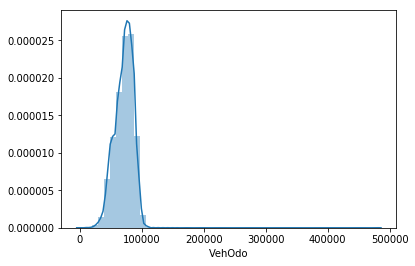

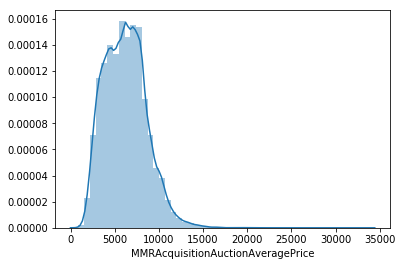

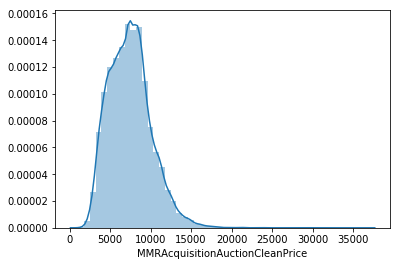

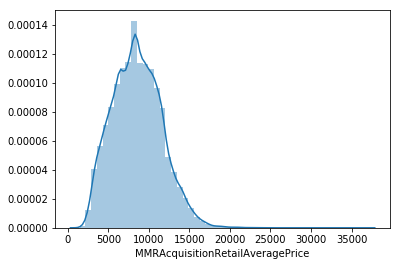

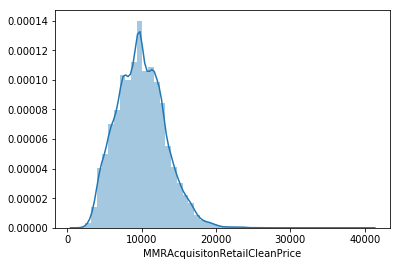

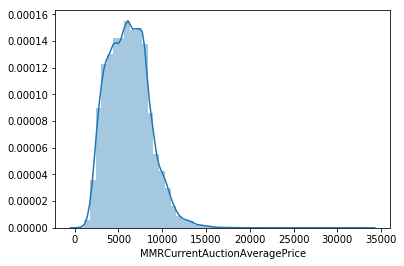

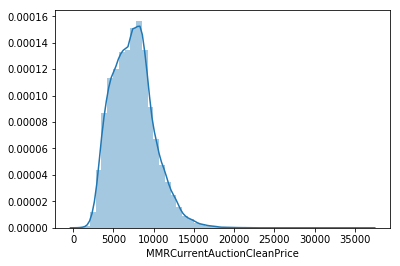

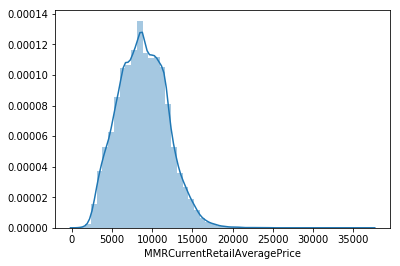

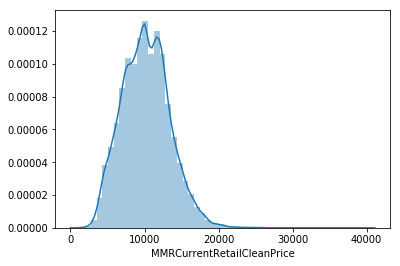

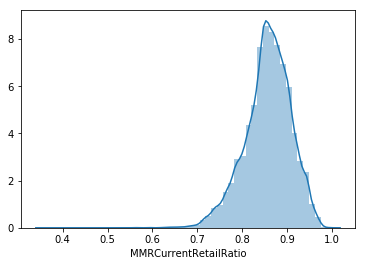

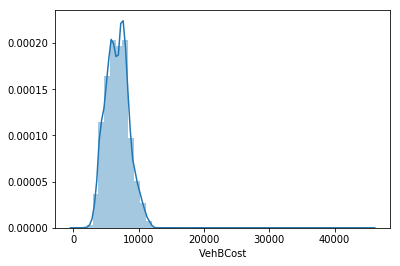

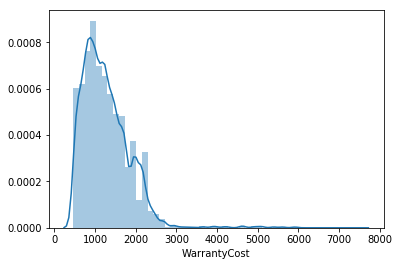

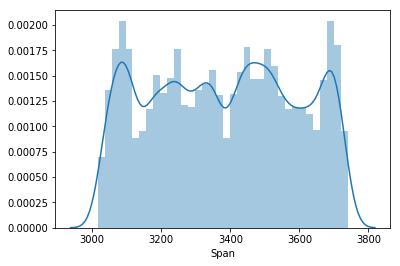

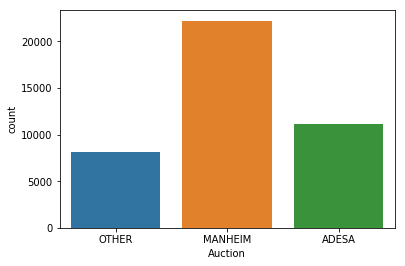

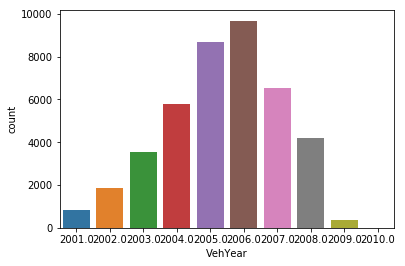

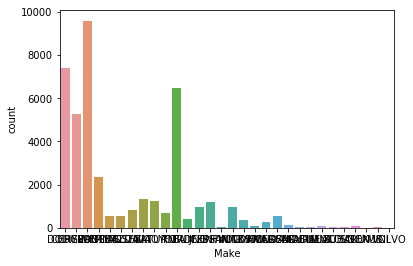

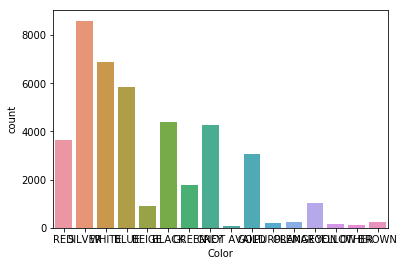

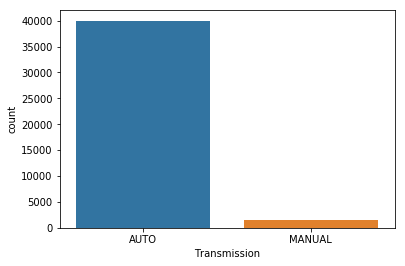

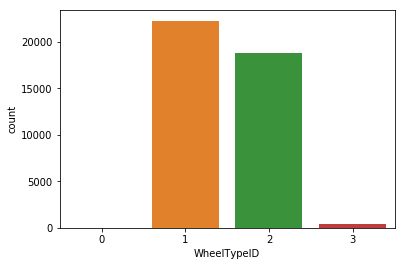

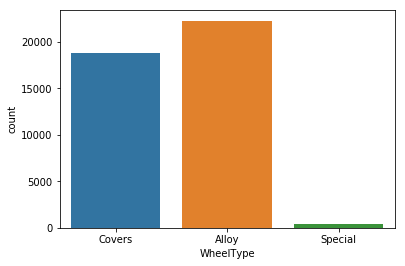

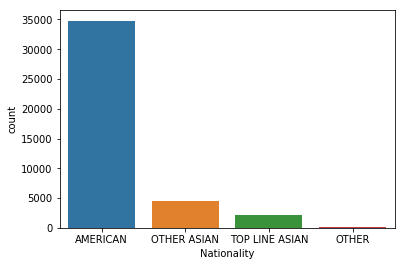

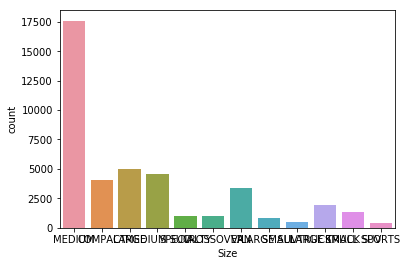

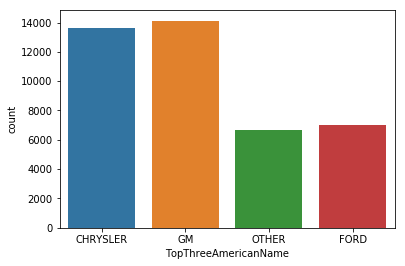

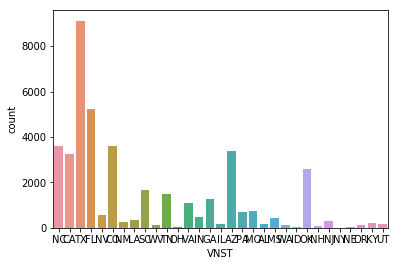

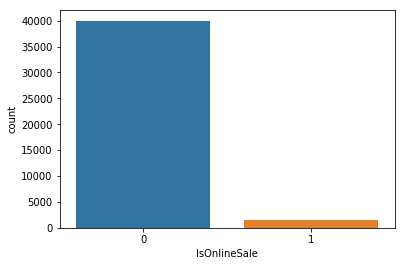

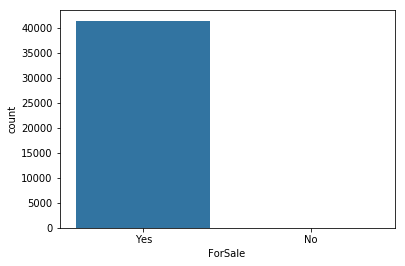

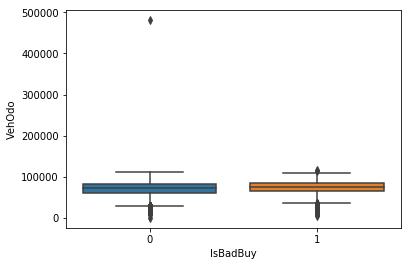

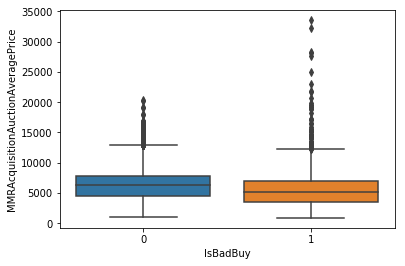

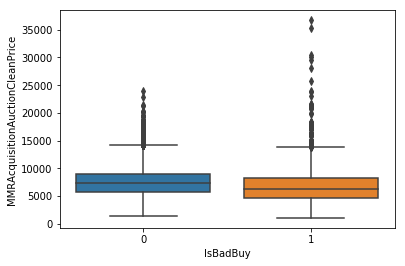

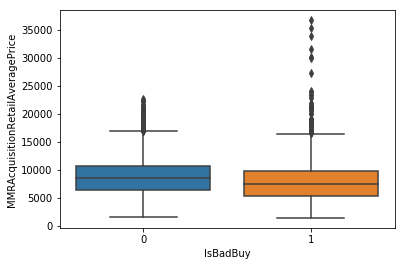

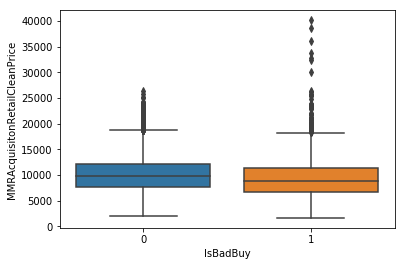

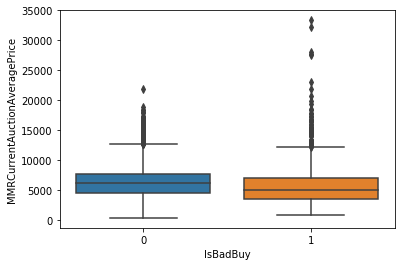

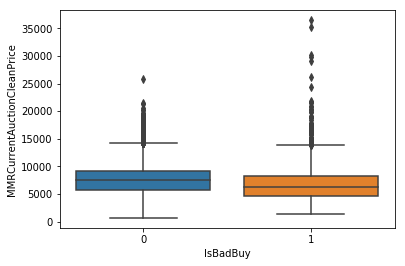

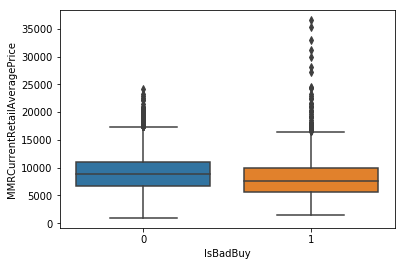

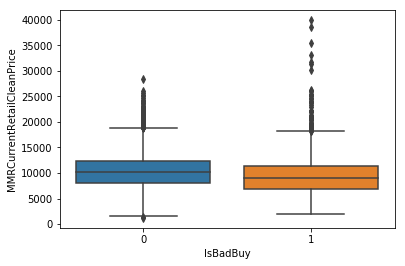

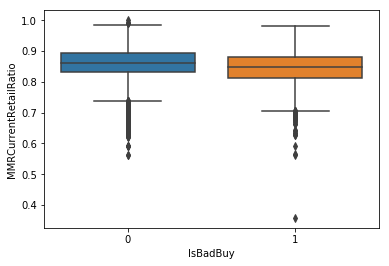

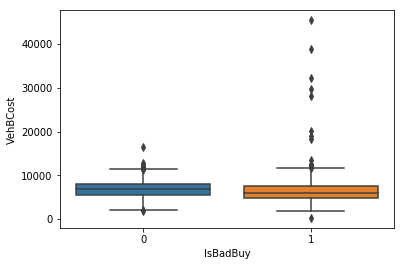

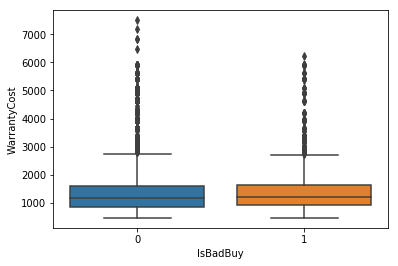

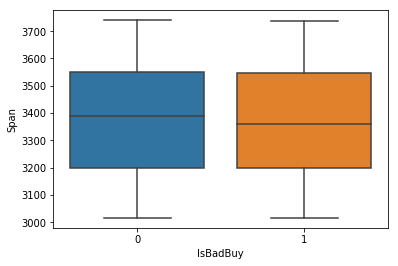

In [4]:
df=data_preprocess();
df.to_csv("Kick_cleaned.csv");
#Task 1.3
features=df.columns;
category_list=[features[0],features[1],features[2],features[3],features[4],features[5],features[6],features[8],features[9],
              features[10],features[20],features[22],features[24]]
numerical_list=[features[7],features[11],features[12],features[13],features[14],features[15],features[16],features[17],features[18],
               features[19],features[21],features[23],features[26]];

for item in numerical_list:
    dg=sns.distplot(df[item].dropna());
    plt.show();
for item2 in category_list:
    dg2=sns.countplot(data=df,x=item2);
    plt.show();
for item in numerical_list:   
    ax=sns.boxplot(x="IsBadBuy",y=item, data=df);
    plt.show();

    

##4 What variable did you include in the analysis and what were their roles and measurement level set? Justify your choice.
As I mention above, the variables I choose for analysis are as follow:    

In [5]:
print("The variables for analysis are as follow:");
print(features);

The variables for analysis are as follow:
Index(['Auction', 'VehYear', 'Make', 'Color', 'Transmission', 'WheelTypeID',
       'WheelType', 'VehOdo', 'Nationality', 'Size', 'TopThreeAmericanName',
       'MMRAcquisitionAuctionAveragePrice', 'MMRAcquisitionAuctionCleanPrice',
       'MMRAcquisitionRetailAveragePrice', 'MMRAcquisitonRetailCleanPrice',
       'MMRCurrentAuctionAveragePrice', 'MMRCurrentAuctionCleanPrice',
       'MMRCurrentRetailAveragePrice', 'MMRCurrentRetailCleanPrice',
       'MMRCurrentRetailRatio', 'VNST', 'VehBCost', 'IsOnlineSale',
       'WarrantyCost', 'ForSale', 'IsBadBuy', 'Span'],
      dtype='object')


Their roles include independent variables and target. 
The independent variables(features) are as follow:

In [6]:
for i in range(0,27, 1):
    if i != 25:
        print(features[i]);

Auction
VehYear
Make
Color
Transmission
WheelTypeID
WheelType
VehOdo
Nationality
Size
TopThreeAmericanName
MMRAcquisitionAuctionAveragePrice
MMRAcquisitionAuctionCleanPrice
MMRAcquisitionRetailAveragePrice
MMRAcquisitonRetailCleanPrice
MMRCurrentAuctionAveragePrice
MMRCurrentAuctionCleanPrice
MMRCurrentRetailAveragePrice
MMRCurrentRetailCleanPrice
MMRCurrentRetailRatio
VNST
VehBCost
IsOnlineSale
WarrantyCost
ForSale
Span


The target(dependent variable) is as follow:

In [7]:
print(features[25]);

IsBadBuy


##5 What distribution scheme did you use? What data partitioning allocation did you set? Explain your selection.
We will shuffle the data by setting 10 as random seed so that I can make sure the train data, validation data and test data have the consistent disribution.
Our data partitioning allocation will be 7:3. It means we are going to split the data into 70% training data and 30% test data.

In [85]:
from sklearn.model_selection import train_test_split;
df_complete=data_preprocess();
y=df_complete["IsBadBuy"];
df=df_complete.drop(["IsBadBuy"],axis=1,inplace=False);
X=pd.get_dummies(df);
#X_mat=X.as_matrix();
X_mat=X.values;
rs=10;
X_train,X_test,y_train,y_test=train_test_split(X_mat,y,test_size=0.3,stratify=y,random_state=rs);

E:\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3185: DtypeWarning: Columns (27) have mixed types. Specify dtype option on import or set low_memory=False.
  if (yield from self.run_code(code, result)):


# Task 2 Predictive Modeling Using Decision Tree
## 1. Build a decision tree using the default setting

In [86]:
from sklearn.tree import DecisionTreeClassifier;
from sklearn.metrics import classification_report, accuracy_score;
model_DT_default=DecisionTreeClassifier(random_state=rs);
model_DT_default.fit(X_train,y_train);
print(model_DT_default);

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=10,
            splitter='best')


### a.What is the classification accuracy on training and test datasets?

In [87]:
print("Train accuracy:", model_DT_default.score(X_train,y_train));
print("Test accuracy:", model_DT_default.score(X_test,y_test));
y_pred=model_DT_default.predict(X_test);
print(classification_report(y_test,y_pred));

Train accuracy: 0.9998622257431199
Test accuracy: 0.7817246644699831
              precision    recall  f1-score   support

           0       0.88      0.87      0.87     10832
           1       0.20      0.22      0.21      1611

   micro avg       0.78      0.78      0.78     12443
   macro avg       0.54      0.54      0.54     12443
weighted avg       0.79      0.78      0.79     12443



importances is list storing all values according to the order of columns rather than ascending or descending order
so, we want to show the each importance value of all attributes with descending order 


### b. What is the size of tree(ie, number of nodes)?

In [88]:
print("The number of nodes is ",model_DT_default.tree_.node_count);

The number of nodes is  7143


### c.How many leaves are in the tree that is selected based on the vaidation data set?

In [89]:
def calculate_num_leaves(dt):
    n_nodes = dt.tree_.node_count
    ll = dt.tree_.children_left
    rl = dt.tree_.children_right
    count = 0
    for i in range(0,n_nodes):
        if (ll[i] & rl[i]) == -1:
            count = count + 1
    return count
print("The number of leaves is ",calculate_num_leaves(model_DT_default));

The number of leaves is  3572


### d.Which variable is used for the first split? What are the competing splits for this split

In [90]:
def output_importance_value(model, X, num):
  importances = model.feature_importances_;
  feature_names = X.columns;
  indices = np.argsort(importances)
  indices = np.flip(indices, axis=0)   
  j=0;
  for i in indices[0:num]:
     j=j+1;
     print(j, ": ",feature_names[i], ':', importances[i]);
output_importance_value(model_DT_default, X, 1);
print("The competing splits for the first split is ",model_DT_default.tree_.threshold[0]);

1 :  VehOdo : 0.08848346501727444
The competing splits for the first split is  2004.5


### e.What are the 5 import variables in building the tree?

In [91]:
print("The top 5 important variables are as follow:")
output_importance_value(model_DT_default, X, 5);

The top 5 important variables are as follow:
1 :  VehOdo : 0.08848346501727444
2 :  VehBCost : 0.08653110523872015
3 :  MMRCurrentRetailRatio : 0.07284668916718223
4 :  Span : 0.06611663490393639
5 :  MMRAcquisitionAuctionAveragePrice : 0.05035039134342573


## f.Report if you see any evidence of model overfitting?
The evidence of model overfitting will be train accuracy is bigger than test accuracy.

In [127]:
def overfitting(model,X_train,y_train, X_test, y_test):
    a=model.score(X_train,y_train);
    b=model.score(X_test,y_test);
    if a>b:
       print("Train Accuracy:",a,">","Test Accuracy:",b);
       print("overfitting occurs!");
    else:
       print("overfitting does not occur!");
overfitting(model_DT_default,X_train,y_train, X_test, y_test);

Train Accuracy: 0.9998622257431199 > Test Accuracy: 0.7817246644699831
overfitting occurs!


## g.Did change the default setting(ie. only focus on changing the setting of the number of splits to create a node) help improving the model? Answer the above questions on the best performing tree.

In [95]:
from sklearn.tree import DecisionTreeClassifier;
from sklearn.metrics import classification_report, accuracy_score;
model_DT=DecisionTreeClassifier(max_features=10,random_state=rs,min_samples_split=2);
model_DT.fit(X_train,y_train);
print(model_DT);
print("the number of splits is :",model_DT.n_features_); 
a=model_DT.score(X_test,y_test);
b=model_DT_default.score(X_test,y_test);
if a>b:
    print("The new tree with setting different from default is better. becasue the new test accuracy  ",a,">","the maximal tree test accuracy",b);
else:
    print("The maximal tree is better, because the new test accuracy ",a,"<","the maximal test accuracy",b);

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=10, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=10,
            splitter='best')
the number of splits is : 126
The new tree with setting different from default is better. becasue the new test accuracy   0.791207908060757 > the maximal tree test accuracy 0.7817246644699831


### a.What is the classification accuracy on training and test datasets?

In [96]:
print("Train accuracy:", model_DT.score(X_train,y_train));
print("Test accuracy:", model_DT.score(X_test,y_test));
y_pred=model_DT.predict(X_test);
print(classification_report(y_test,y_pred));

Train accuracy: 0.9998622257431199
Test accuracy: 0.791207908060757
              precision    recall  f1-score   support

           0       0.88      0.88      0.88     10832
           1       0.21      0.22      0.21      1611

   micro avg       0.79      0.79      0.79     12443
   macro avg       0.55      0.55      0.55     12443
weighted avg       0.80      0.79      0.79     12443



###b. What is the size of tree(ie, number of nodes)?

In [97]:
print("The number of nodes is ",model_DT.tree_.node_count);

The number of nodes is  12369


### c.How many leaves are in the tree that is selected based on the vaidation data set?

In [98]:
print("The number of leaves is ",calculate_num_leaves(model_DT));

The number of leaves is  6185


### d.Which variable is used for the first split? What are the competing splits for this split?

In [99]:
output_importance_value(model_DT, X, 1);
print("The competing splits for the first split is ",model_DT.tree_.threshold[0]);

1 :  MMRAcquisitionAuctionCleanPrice : 0.06992839926427608
The competing splits for the first split is  5397.5


### e.What are the 5 import variables in building the tree?

In [100]:
output_importance_value(model_DT, X, 5);

1 :  MMRAcquisitionAuctionCleanPrice : 0.06992839926427608
2 :  VehOdo : 0.06280121049387372
3 :  Span : 0.05872662092466835
4 :  VehBCost : 0.05816146604348282
5 :  MMRCurrentRetailAveragePrice : 0.056861864097262446


## f.Report if you see any evidence of model overfitting?

In [101]:
overfitting(model_DT,X_train,y_train, X_test, y_test);

Train Accuracy: 0.9998622257431199 > Test Accuracy: 0.791207908060757
overfitting occurs!


In [102]:
import graphviz;
from sklearn.tree import export_graphviz;
def visualize_decisiontree(model,y):
    class_name=y.values.astype(str);# need to change int to str for taget value
    dot=export_graphviz(model, out_file=None,feature_names=X.columns,class_names=class_name,filled=True, rounded=True,special_characters=True);
    graph=graphviz.Source(dot);
    graph.render("DecisionTree");# keep the tree model in PDF file "DecisionTree.pdf" so we don't need to add extention name
    graph 

## 2. Build another decision tree tuned with GridSearchCV

In [103]:
from sklearn.model_selection import GridSearchCV
params = {'criterion': ['gini', 'entropy'],
          'max_depth': range(2,5,1),
          'max_features':range(5,6,1),
          'min_samples_leaf': range(1, 10, 1),
          'min_samples_split':range(2000,2200,200)
         }
cv_DT = GridSearchCV(param_grid=params, estimator=DecisionTreeClassifier(random_state=rs), cv=10)
cv_DT.fit(X_train, y_train);

### a.What is the classification accuracy on training and test datasets?

In [104]:
print("Train accuracy:", cv_DT.score(X_train, y_train))
print("Test accuracy:", cv_DT.score(X_test, y_test));
y_pred = cv_DT.predict(X_test)
print(classification_report(y_test, y_pred))
print("The parameters used are :",cv_DT.best_params_);  

Train accuracy: 0.8704921985327042
Test accuracy: 0.8705296150446034
              precision    recall  f1-score   support

           0       0.87      1.00      0.93     10832
           1       0.00      0.00      0.00      1611

   micro avg       0.87      0.87      0.87     12443
   macro avg       0.44      0.50      0.47     12443
weighted avg       0.76      0.87      0.81     12443

The parameters used are : {'criterion': 'gini', 'max_depth': 2, 'max_features': 5, 'min_samples_leaf': 1, 'min_samples_split': 2000}


E:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
E:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
E:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


### b.What is the size of tree(ie, number of nodes)? Is the size different from the maximal tree or the tree in the previous step? why

In [105]:
#model_cv_DT=DecisionTreeClassifier(criterion='gini',max_features=5,max_depth=2,random_state=rs,min_samples_leaf=1,min_samples_split=2000);
model_cv_DT=cv_DT.best_estimator_;
model_cv_DT.fit(X_train,y_train);
print("The number of nodes is ",model_cv_DT.tree_.node_count);

The number of nodes is  5


### c.How many leaves are in the tree that is selected based on the vaidation data set?

In [106]:
print("The number of leaves is ",calculate_num_leaves(model_cv_DT));

The number of leaves is  3


### d.Which variable is used for the first split? What are the competing splits for this split?

In [107]:
output_importance_value(model_cv_DT, X, 1);
print("The competing splits for the first split is ",model_cv_DT.tree_.threshold[0]);

1 :  Make_MERCURY : 0.7327300908794693
The competing splits for the first split is  0.5


### e.What are the 5 import variables in building the tree?

In [108]:
output_importance_value(model_cv_DT, X, 5);

1 :  Make_MERCURY : 0.7327300908794693
2 :  Make_JEEP : 0.26726990912053067
3 :  Make_VOLKSWAGEN : 0.0
4 :  Make_LINCOLN : 0.0
5 :  Make_MAZDA : 0.0


## f.Report if you see any evidence of model overfitting?

In [109]:
overfitting(model_cv_DT,X_train,y_train, X_test, y_test);

overfitting does not occur!


## e.What are the parameters used? Explain your choices.

In [110]:
print("The parameters used are :",cv_DT.best_params_);

The parameters used are : {'criterion': 'gini', 'max_depth': 2, 'max_features': 5, 'min_samples_leaf': 1, 'min_samples_split': 2000}


## 3. What is the significant difference do you see between these two decision tree models(step 2.1 &step 2.1)? How do they compare performace-wise? Explain why those changes may have happen?
The significant difference I can see between the two decision tree models is the overfitting disappears. 
The tree model built in step 2.2 has better performace, although the train accuracy is lower than the model built in step 2.1(0.87<0.99), the test accuracy is much bigger (0.87>0.79)
The reason why those changes happen is the max depth is limited with 5. the model built in step 2.1 should be maximal tree without any limitation in max depth.

## 4.From the better model, can you identify which cars could be potential "kicks"? Can you provide some descriptive summary of those cars?


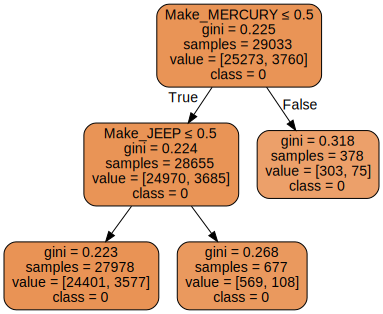

In [111]:
import graphviz;
from sklearn.tree import export_graphviz;
class_name=y.values.astype(str);# need to change int to str for taget value
dot=export_graphviz(model_cv_DT, out_file=None,feature_names=X.columns,class_names=class_name,filled=True, rounded=True,special_characters=True);
graph=graphviz.Source(dot);
#graph.render("DecisionTree");# keep the tree model in PDF file "DecisionTree.pdf" so we don't need to add extention name
graph 

# Task 3. Predictive Modeling Using Regression

## 1. In preparation for regression, is any imputation of missing values needed for this data set? List variables that needed this
Yes, near each column has missing value

In [114]:
print(df2.isnull().sum(),end="\n\n");

Auction                               44
VehYear                               44
Make                                  44
Color                                 44
Transmission                          44
WheelTypeID                           44
WheelType                             96
VehOdo                                44
Nationality                           44
Size                                  44
TopThreeAmericanName                  44
MMRAcquisitionAuctionAveragePrice     60
MMRAcquisitionAuctionCleanPrice       47
MMRAcquisitionRetailAveragePrice      47
MMRAcquisitonRetailCleanPrice        149
MMRCurrentAuctionAveragePrice         47
MMRCurrentAuctionCleanPrice           47
MMRCurrentRetailAveragePrice          67
MMRCurrentRetailCleanPrice            67
MMRCurrentRetailRatio                360
PRIMEUNIT                             44
AUCGUART                              44
VNST                                  44
VehBCost                              44
IsOnlineSale    

## 2.Apply transformation method(s) to the variable(s) that need it.List the variable that need it. 

In [115]:
columns_to_log=[features[7],features[11],features[12],features[13],features[14],features[15],features[16],features[17],features[18],
               features[19],features[21],features[23]];
numerical_list=[features[7],features[11],features[12],features[13],features[14],features[15],features[16],features[17],features[18],
               features[19],features[21],features[23],features[26]];
print("The variable need transformation are as follow:" );
print(numerical_list);

The variable need transformation are as follow:
['VehOdo', 'MMRAcquisitionAuctionAveragePrice', 'MMRAcquisitionAuctionCleanPrice', 'MMRAcquisitionRetailAveragePrice', 'MMRAcquisitonRetailCleanPrice', 'MMRCurrentAuctionAveragePrice', 'MMRCurrentAuctionCleanPrice', 'MMRCurrentRetailAveragePrice', 'MMRCurrentRetailCleanPrice', 'MMRCurrentRetailRatio', 'VehBCost', 'WarrantyCost', 'Span']


E:\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3185: DtypeWarning: Columns (27) have mixed types. Specify dtype option on import or set low_memory=False.
  if (yield from self.run_code(code, result)):
E:\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


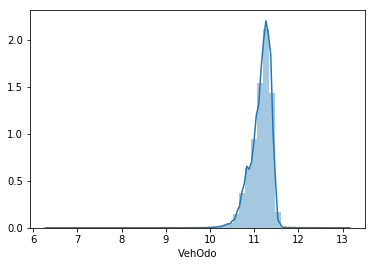

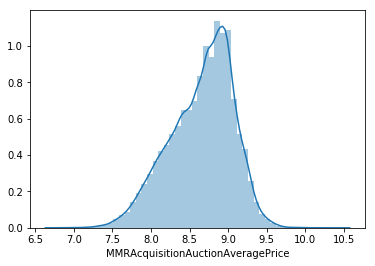

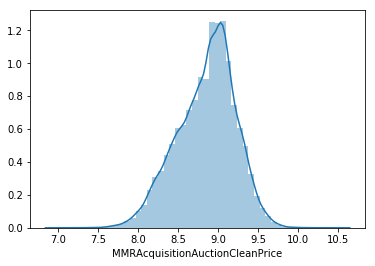

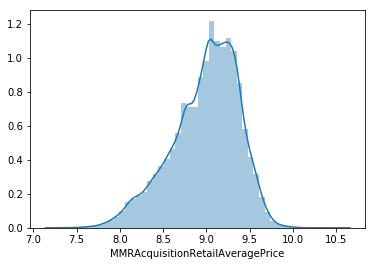

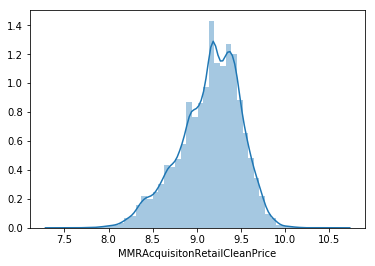

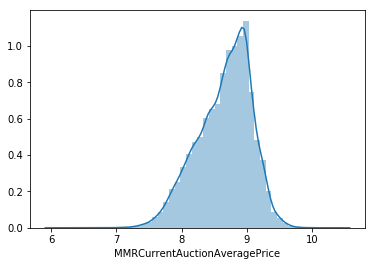

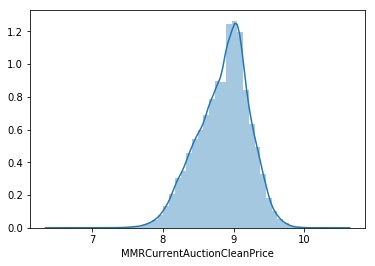

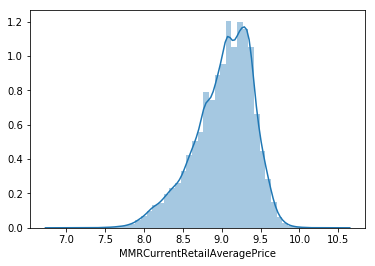

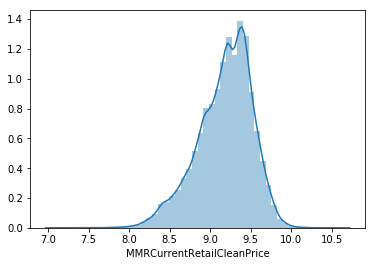

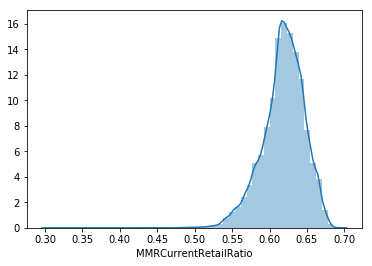

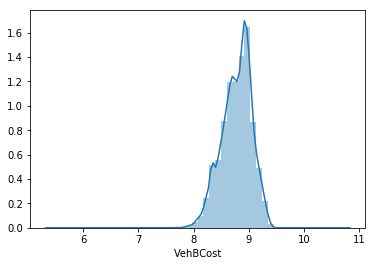

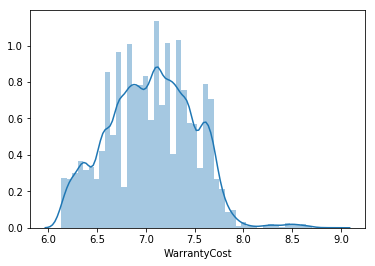

In [43]:
# log transformation
# logistic regresssion
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split;
df_complete=data_preprocess();
y=df_complete["IsBadBuy"];
df=df_complete.drop(["IsBadBuy"],axis=1,inplace=False);
df_log = df.copy();
for col in columns_to_log:
    df_log[col] = df_log[col].apply(lambda x: x+1)
    df_log[col] = df_log[col].apply(np.log);
    dg=sns.distplot(df_log[col].dropna());
    plt.show(); 

In [116]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split;
## standardization 
X=pd.get_dummies(df_log);
#X_mat=X.as_matrix();
X_mat=X.values;
rs=10;
X_train_log,X_test_log,y_train_log,y_test_log=train_test_split(X_mat,y,test_size=0.3,stratify=y,random_state=rs);
scaler = StandardScaler()
X_train_log_sd = scaler.fit_transform(X_train_log, y_train_log)
X_test_log_sd = scaler.transform(X_test_log);

## 3. Build a regression model using the default regression method with all inputs. Once you done it, build another one and tune it using GridSearchCV.Answer the following:
### a. Name the regression function used.
logistic regression

In [117]:
model_Logistic_R = LogisticRegression(random_state=rs);
model_Logistic_R.fit(X_train, y_train);
print("Train accuracy:", model_Logistic_R.score(X_train_log_sd, y_train_log))
print("Test accuracy:", model_Logistic_R.score(X_test_log_sd, y_test_log))
y_pred = model_Logistic_R.predict(X_test_log_sd)
print(classification_report(y_test, y_pred));
print(model_Logistic_R);

E:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Train accuracy: 0.5726242551579237
Test accuracy: 0.5707626778108174
              precision    recall  f1-score   support

           0       0.93      0.55      0.69     10832
           1       0.19      0.70      0.30      1611

   micro avg       0.57      0.57      0.57     12443
   macro avg       0.56      0.63      0.49     12443
weighted avg       0.83      0.57      0.64     12443

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=10, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)


### i How much was the difference in performance of two models build,default and optimal?

In [118]:
# GridSearch
params = {'C': [pow(10, x) for x in range(-6, 4)]};
cv_regression = GridSearchCV(param_grid=params, estimator=LogisticRegression(random_state=rs), cv=10, n_jobs=-1)
cv_regression.fit(X_train_log_sd, y_train_log);
print("Train accuracy:", cv_regression.score(X_train_log_sd, y_train_log))
print("Test accuracy:", cv_regression.score(X_test_log_sd, y_test_log))
y_pred = cv_regression.predict(X_test_log_sd)
print(classification_report(y_test_log, y_pred));
print(cv_regression.best_params_);

E:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Train accuracy: 0.8711810698171046
Test accuracy: 0.8705296150446034
              precision    recall  f1-score   support

           0       0.87      1.00      0.93     10832
           1       0.50      0.01      0.02      1611

   micro avg       0.87      0.87      0.87     12443
   macro avg       0.69      0.51      0.48     12443
weighted avg       0.82      0.87      0.81     12443

{'C': 0.1}


In [119]:
a=model_Logistic_R.score(X_train_log_sd, y_train_log);
b=model_Logistic_R.score(X_test_log_sd, y_test_log);
a1=cv_regression.score(X_train_log_sd, y_train_log);
b1=cv_regression.score(X_test_log_sd, y_test_log);
if (b1>b) and (a1>a):
    print("optimal is better than default,");
    print("default model test accuracy:",b1,">","optional model test accuracy:",b);
    print("default model test accuracy:",a1,">","optional model test accuracy:",a);    

optimal is better than default,
default model test accuracy: 0.8705296150446034 > optional model test accuracy: 0.5707626778108174
default model test accuracy: 0.8711810698171046 > optional model test accuracy: 0.5726242551579237


### j.show the set parameters for the best model. What are the parameters used?Explain your decision. What are the optimal parameters?

In [120]:
print(cv_regression.best_params_);
#model_Logistic_R_optimal = LogisticRegression(C=0.1,random_state=rs);
model_Logistic_R_optimal=cv_regression.best_estimator_;
model_Logistic_R_optimal.fit(X_train_log_sd, y_train_log);
print(model_Logistic_R_optimal);

{'C': 0.1}


E:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=10, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)


### k Report which variables are included in the regression model.

In [121]:
coef = model_Logistic_R.coef_[0]
#coef = coef[:20]
for i in range(len(coef)):
    print(X.columns[i],":",coef[i]);


VehYear : -0.00044921224355909205
VehOdo : 1.270194084723597e-05
MMRAcquisitionAuctionAveragePrice : -0.0005560134236363792
MMRAcquisitionAuctionCleanPrice : 0.0002422225130405407
MMRAcquisitionRetailAveragePrice : 0.00023711637385022882
MMRAcquisitonRetailCleanPrice : -1.420774242953148e-05
MMRCurrentAuctionAveragePrice : 0.0003314461113081403
MMRCurrentAuctionCleanPrice : -0.0001109603290352782
MMRCurrentRetailAveragePrice : -0.00028916540162401234
MMRCurrentRetailCleanPrice : 1.5848211711491594e-05
MMRCurrentRetailRatio : -6.202703585709013e-07
VehBCost : -2.006394345993529e-05
IsOnlineSale : -1.7326140130674251e-06
WarrantyCost : 3.232369381725277e-05
Span : -0.0002898613247947968
Auction_ADESA : 2.1566634103753836e-05
Auction_MANHEIM : -2.4249077777886265e-05
Auction_OTHER : 2.5218200803867126e-06
Make_ACURA : 4.6612227992033036e-07
Make_BUICK : -5.60088098959159e-07
Make_CADILLAC : 9.06848656799362e-09
Make_CHEVROLET : -2.258218166931579e-05
Make_CHRYSLER : 3.6906601572722435e-06

### l Report the top-5 important variable (in the order) in the model

In [122]:
# display the coefficiency according to the descending order of absolute value of coefficiency 
indices = np.argsort(np.absolute(coef));
indices = np.flip(indices, axis=0);
j=0;
for i in indices[0:5]:
    j=j+1;
    print("No.",j,X.columns[i], ':', coef[i]);

No. 1 MMRAcquisitionAuctionAveragePrice : -0.0005560134236363792
No. 2 VehYear : -0.00044921224355909205
No. 3 MMRCurrentAuctionAveragePrice : 0.0003314461113081403
No. 4 Span : -0.0002898613247947968
No. 5 MMRCurrentRetailAveragePrice : -0.00028916540162401234


### m. What is classification accuracy on trianing and test datasets?

In [126]:
print("training accuracy :",model_Logistic_R_optimal.score(X_train_log_sd, y_train_log));
print("test accuracy: ",model_Logistic_R_optimal.score(X_test_log_sd, y_test_log));

training accuracy : 0.8711810698171046
test accuracy:  0.8705296150446034


### n. Report any sign of overfitting

In [128]:
overfitting(model_Logistic_R_optimal,X_train_log_sd, y_train_log,X_test_log_sd, y_test_log);


Train Accuracy: 0.8711810698171046 > Test Accuracy: 0.8705296150446034
overfitting occurs!


## 4. Build another regression model using the subset of inputs selected by RFE and selection by model. Answer the following:

In [165]:
#RFECV spend too much time but can't get the result
from sklearn.feature_selection import RFECV
rfe_log_R = RFECV(estimator = LogisticRegression(random_state=rs), cv=10)
rfe_log_R.fit(X_train_log_sd, y_train_log) 
print("Original feature set", X_train_log_sd.shape[1]);
print("Number of features after elimination", rfe_log_R.n_features_)

E:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda3\lib\site-packages

E:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda3\lib\site-packages

E:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda3\lib\site-packages

E:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda3\lib\site-packages

E:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda3\lib\site-packages

E:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda3\lib\site-packages

E:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda3\lib\site-packages

E:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda3\lib\site-packages

E:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda3\lib\site-packages

E:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda3\lib\site-packages

E:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda3\lib\site-packages

E:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda3\lib\site-packages

E:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda3\lib\site-packages

E:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda3\lib\site-packages

E:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda3\lib\site-packages

E:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda3\lib\site-packages

E:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda3\lib\site-packages

E:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda3\lib\site-packages

E:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda3\lib\site-packages

E:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda3\lib\site-packages

E:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda3\lib\site-packages

E:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda3\lib\site-packages

E:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda3\lib\site-packages

E:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda3\lib\site-packages

E:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda3\lib\site-packages

E:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda3\lib\site-packages

E:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda3\lib\site-packages

E:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda3\lib\site-packages

E:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda3\lib\site-packages

E:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda3\lib\site-packages

E:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda3\lib\site-packages

E:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda3\lib\site-packages

Original feature set 126


NameError: name 'rfe' is not defined

#### using decision tree model to select features

In [74]:
# using decision tree model to select feature.
from sklearn.tree import DecisionTreeClassifier
params = {'criterion': ['gini', 'entropy'],
          'max_depth': range(2,5,1),
          'max_features':range(5,6,1),
          'min_samples_leaf': range(1, 10, 1),
          'min_samples_split':range(2000,2200,200)
         }
cv_feature_selection = GridSearchCV(param_grid=params, estimator=DecisionTreeClassifier(random_state=rs), cv=10)
cv_feature_selection.fit(X_train_log_sd, y_train_log);
print(cv_feature_selection.best_params_)

{'criterion': 'gini', 'max_depth': 2, 'max_features': 5, 'min_samples_leaf': 1, 'min_samples_split': 2000}


In [77]:
selection_model_DT=DecisionTreeClassifier(criterion='gini',max_features=5,max_depth=2,random_state=rs,min_samples_leaf=1,min_samples_split=2000);
selection_model_DT.fit(X_train_log_sd,y_train_log);

### a. Report which variables are included in the regression model

In [82]:
output_importance_value(cv_feature_selection.best_estimator_, X, 2);

1 :  Make_MERCURY : 0.7327300908794693
2 :  Make_JEEP : 0.26726990912053067


### b. Report the top 5 important variables( in the order) in the model?

In [132]:
output_importance_value(cv_feature_selection.best_estimator_, X, 5);

1 :  Make_MERCURY : 0.7327300908794693
2 :  Make_JEEP : 0.26726990912053067
3 :  Make_VOLKSWAGEN : 0.0
4 :  Make_LINCOLN : 0.0
5 :  Make_MAZDA : 0.0


In [83]:
from sklearn.feature_selection import SelectFromModel
# use the trained best decision tree from GridSearchCV to select features
# supply the prefit=True parameter to stop SelectFromModel to re-train the model
selectmodel = SelectFromModel(cv_feature_selection.best_estimator_, prefit=True)
X_train_sel_model = selectmodel.transform(X_train_log_sd)
X_test_sel_model = selectmodel.transform(X_test_log_sd)
print(X_train_sel_model.shape)

(29033, 2)


### c.What are the parameters used ? Explain your choices. What are the optimal parameters? Which regression funcion is being used?
The parameter used will be c for regression. The function is logistical regression

In [129]:
params = {'C': [pow(10, x) for x in range(-6, 4)]}
cv_selectfeature_tree = GridSearchCV(param_grid=params, estimator=LogisticRegression(random_state=rs), cv=10, n_jobs=-1)
cv_selectfeature_tree.fit(X_train_sel_model, y_train_log)
print("Train accuracy:", cv_selectfeature_tree.score(X_train_sel_model, y_train_log))
print("Test accuracy:", cv_selectfeature_tree.score(X_test_sel_model, y_test_log))
y_pred = cv_selectfeature_tree.predict(X_test_sel_model)
print(classification_report(y_test_log, y_pred))
print(cv_selectfeature_tree.best_params_)

E:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Train accuracy: 0.8704921985327042
Test accuracy: 0.8705296150446034
              precision    recall  f1-score   support

           0       0.87      1.00      0.93     10832
           1       0.00      0.00      0.00      1611

   micro avg       0.87      0.87      0.87     12443
   macro avg       0.44      0.50      0.47     12443
weighted avg       0.76      0.87      0.81     12443

{'C': 1e-06}


E:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
E:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
E:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [135]:
print("The parameters for logistic regression are as follow:\n",cv_selectfeature_tree.best_estimator_);

The parameters for logistic regression are as follow:
 LogisticRegression(C=1e-06, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=10, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)


### d. Report any sign of overfitting?

In [130]:
overfitting(cv_selectfeature_tree.best_estimator_,X_train_sel_model,y_train_log,X_test_sel_model,y_test_log );

overfitting does not occur!


### e. What is classification accuracy on trainning data and test dataset?

In [131]:
print("Train accuracy:", cv_selectfeature_tree.score(X_train_sel_model, y_train_log))
print("Test accuracy:", cv_selectfeature_tree.score(X_test_sel_model, y_test_log))

Train accuracy: 0.8704921985327042
Test accuracy: 0.8705296150446034


### f. Did it improve /worsen the performance ? Explain why those changes may happen.

## 5. Using the best regression model, which cars could be potiental "Kicks" ? Can you provide some descriptive summary of those cars?

# Task 4 Predictive Modeling Using Neural Networks

## 1. Build a Neural Network model using the default setting . Answer the following:

In [136]:
from sklearn.neural_network import MLPClassifier;
NN_default = MLPClassifier(random_state=rs);
NN_default.fit(X_train_log_sd, y_train_log);
print("Train accuracy:",NN_default.score(X_train_log_sd, y_train_log));
print("Test accuracy:",NN_default.score(X_test_log_sd, y_test_log));
y_pred = NN_default.predict(X_test_log_sd);
print(classification_report(y_test_log, y_pred))
print(NN_default);

Train accuracy: 0.9329039368993903
Test accuracy: 0.8297838141927188
              precision    recall  f1-score   support

           0       0.88      0.93      0.90     10832
           1       0.25      0.16      0.20      1611

   micro avg       0.83      0.83      0.83     12443
   macro avg       0.57      0.55      0.55     12443
weighted avg       0.80      0.83      0.81     12443

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=10, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)


E:\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


### a. What is the network architecture?
Neural Networks commonly has three layers. The first layer is input layer, the second layer is hidden layer. the third layer is output layer. The first layer consists of input variables, there are 126 neurons. The hidden layer size is 100 , it means there are 100 neurons in hidden layer. As the output layer is target, there is always 1 neuron in output layer.

In [143]:
print(X_train_log_sd.shape);

(29033, 126)


### b. How many iterations are needed to train this network?

In [137]:
print("the iteration times is ",NN_default.n_iter_);

the iteration times is  200


### c. Do you see any sign of over-fitting

In [138]:
overfitting(NN_default,X_train_log_sd,y_train_log,X_test_log_sd,y_test_log);

Train Accuracy: 0.9329039368993903 > Test Accuracy: 0.8297838141927188
overfitting occurs!


### d. Did the training process converge and resulted in the best model?
because there is warning message appears, the training process can not reach convergence.

### e. What is classification accuracy on trianing and test data?

In [139]:
print("Train accuracy:",NN_default.score(X_train_log_sd, y_train_log));
print("Test accuracy:",NN_default.score(X_test_log_sd, y_test_log));

Train accuracy: 0.9329039368993903
Test accuracy: 0.8297838141927188


## 2 refine this network by tuning it with GridSearchCV.

In [140]:
print(X_train_log_sd.shape);

(29033, 126)


Initially, there shold be 126 features for building the Neural Network.

In [147]:
params = {'hidden_layer_sizes': [(3,), (5,), (7,), (9,)], 'alpha': [0.01,0.001, 0.0001, 0.00001]}
cv_NN = GridSearchCV(param_grid=params, estimator=MLPClassifier(random_state=rs), cv=10, n_jobs=-1)
cv_NN.fit(X_train_log_sd, y_train_log);
print("Train accuracy:", cv_NN.score(X_train_log_sd, y_train_log))
print("Test accuracy:", cv_NN.score(X_test_log_sd, y_test_log))
y_pred = cv_NN.predict(X_test_log_sd)
print(classification_report(y_test_log, y_pred))
print(cv_NN.best_params_);

Train accuracy: 0.8717321668446251
Test accuracy: 0.8711725468134695
              precision    recall  f1-score   support

           0       0.87      1.00      0.93     10832
           1       0.55      0.03      0.05      1611

   micro avg       0.87      0.87      0.87     12443
   macro avg       0.71      0.51      0.49     12443
weighted avg       0.83      0.87      0.82     12443

{'alpha': 1e-05, 'hidden_layer_sizes': (3,)}


###  a. What is the network architecture
Neural Networks commonly has three layers. The first layer is input layer, the second layer is hidden layer. the third layer is output layer. The first layer consists of input variables, there are 126 neurons. The hidden layer size is 3 , it means there are 3 neurons in hidden layer. As the output layer is target, there is always 1 neuron in output layer.

In [155]:
print(cv_NN.best_estimator_);

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(3,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=10, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)


### b. How many iterations are needed to trian this network?

In [149]:
print("the iteration times is ",cv_NN.best_estimator_.n_iter_);

the iteration times is  88


### c. Sign of overfitting?

In [150]:
overfitting(cv_NN.best_estimator_,X_train_log_sd,y_train_log,X_test_log_sd,y_test_log);

Train Accuracy: 0.8717321668446251 > Test Accuracy: 0.8711725468134695
overfitting occurs!


### d. Did the training process converge and resulted in the best model?
Since the warning message doesn't appear, it should reach the convergence. There training process would result in the best model under the given options for parameters.

### e .What is classification accuracy on training and test dataset?

In [151]:
print("Train accuracy:", cv_NN.score(X_train_log_sd, y_train_log))
print("Test accuracy:", cv_NN.score(X_test_log_sd, y_test_log));

Train accuracy: 0.8717321668446251
Test accuracy: 0.8711725468134695


## 3 Build another Neural Network model with input selected from RFE with regression(use the best model generated in Task 3) and selection with decsion tree(use the best model from task 2). 
#### using decsion tree for feature selection

In [152]:
params = {'hidden_layer_sizes': [(3,), (5,), (7,), (9,)], 'alpha': [0.01,0.001, 0.0001, 0.00001]}
cv_NN_select_DT = GridSearchCV(param_grid=params, estimator=MLPClassifier(random_state=rs), cv=10, n_jobs=-1)
cv_NN_select_DT.fit(X_train_sel_model, y_train_log);
print("Train accuracy:", cv_NN_select_DT.score(X_train_sel_model, y_train_log))
print("Test accuracy:", cv_NN_select_DT.score(X_test_sel_model, y_test_log))
y_pred = cv_NN_select_DT.predict(X_test_sel_model)
print(classification_report(y_test_log, y_pred))
print(cv_NN_select_DT.best_params_);

Train accuracy: 0.8704921985327042
Test accuracy: 0.8705296150446034
              precision    recall  f1-score   support

           0       0.87      1.00      0.93     10832
           1       0.00      0.00      0.00      1611

   micro avg       0.87      0.87      0.87     12443
   macro avg       0.44      0.50      0.47     12443
weighted avg       0.76      0.87      0.81     12443

{'alpha': 0.01, 'hidden_layer_sizes': (3,)}


E:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
E:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
E:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


### a Did feature selection help here? Any change in the network architecture? What inputs are being used as the network input?
There is no change in the network architecture. 

In [157]:
print(cv_NN_select_DT.best_estimator_);
print("The input variables used are as folllow:");
output_importance_value(cv_feature_selection.best_estimator_, X, 2);

MLPClassifier(activation='relu', alpha=0.01, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(3,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=10, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)
The input variables used are as folllow:
1 :  Make_MERCURY : 0.7327300908794693
2 :  Make_JEEP : 0.26726990912053067


### b What is classification accuracy on training and test datasets? Is there any improvement in the outcome?

In [158]:
print("Train accuracy:", cv_NN_select_DT.score(X_train_sel_model, y_train_log))
print("Test accuracy:", cv_NN_select_DT.score(X_test_sel_model, y_test_log))

Train accuracy: 0.8704921985327042
Test accuracy: 0.8705296150446034


### c How many iterations are now needed  to train this network?

In [164]:
print("the iteration times is ",cv_NN_select_DT.best_estimator_.n_iter_);

the iteration times is  22


### d Do you see any sign of overfitting?

In [163]:
overfitting(cv_NN_select_DT.best_estimator_,X_train_sel_model,y_train_log,X_test_sel_model,y_test_log);

overfitting does not occur!


### e Did the training process converge and resulted in the best model?
becasue the parameter max_iter is set to be 200, actually the training process needs 22 iteration. There is no warning message raised. Therefore, the training process reaches the convergence and results in the best model.

## 4 Using the comparison methods ,which of the models (i.e one with selected variables and another with all variables) appears to be better?
## From the better model, can you identify cars those could be potential "Kicks"? Can you provide some descriptive summary of those cars?
## Is it easy to comprehend the performance of the best neural network model for decision making?


# Task 5 Generating an Ensemble Model and Comparing Models

## 1 Generate an ensemble model to include the best regression model, best decision tree model, and best neural network model.
### a. Does the Ensemble model outperform the underlying models? Resonate your answer

## 2 Use the comparison methods (or comparison node) to compare the best decision tree model, the best regression model, the best neural network model and teh ensemble model.

### a. Discuss the finding led by (a) ROC Chart (and Index); (b) Score Ranking (or Accuracy Score); (c) Fit Statistics;(or Classification report) and (4) Output.

### b. Do all the models agree on the cars characteristics? How do they vary?

# Task 6 Final Remark: Decision Making

## 1. Finally, based on all models and analysis , is there a particular model you will use in decision making ? justify your choice.

## 2.Can you summarise positives and negatives of each predictive modeling method based on this analysis?

## 3. How the outcome of this study can be used by decision makers?